In [53]:
# Import libreries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [71]:
# Import dataset
df = pd.read_csv('/content/data/tip.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: >

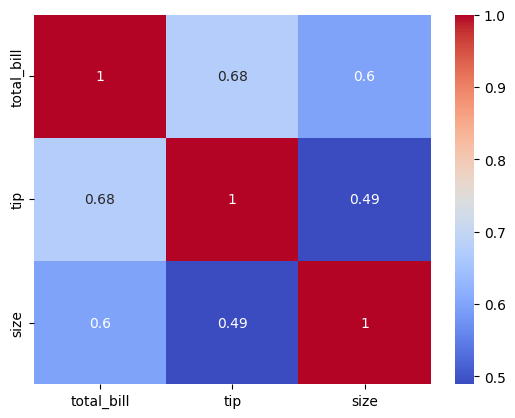

In [63]:
# Exploratory data analysis: correlation and heatmap
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

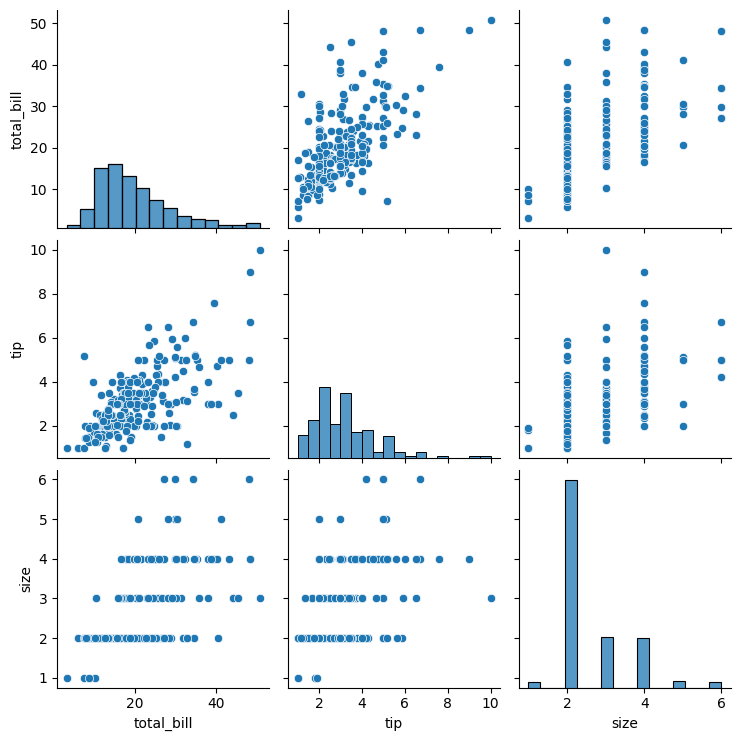

In [64]:
#Exploratory data analysis : pairplot
sns.pairplot(df)


In [73]:
# Convert non-numerci data using one-hot encoding
df = pd.get_dummies(df, columns= ['time','day', 'smoker', 'sex'])
df.head()

,total_bill,tip,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,sex_Female,sex_Male
0,16.99,1.01,2,True,False,False,False,True,False,True,False,True,False
1,10.34,1.66,3,True,False,False,False,True,False,True,False,False,True
2,21.01,3.50,3,True,False,False,False,True,False,True,False,False,True
3,23.68,3.31,2,True,False,False,False,True,False,True,False,False,True
4,24.59,3.61,4,True,False,False,False,True,False,True,False,True,False


In [74]:
df_corr = df.corr(numeric_only=True)
df_corr

,total_bill,tip,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,sex_Female,sex_Male
total_bill,1.000000,0.675734,0.598315,0.183118,-0.183118,-0.086168,0.054919,0.122953,-0.138174,-0.085721,0.085721,-0.144877,0.144877
tip,0.675734,1.000000,0.489299,0.121629,-0.121629,-0.055463,-0.002790,0.125114,-0.095879,-0.005929,0.005929,-0.088862,0.088862
size,0.598315,0.489299,1.000000,0.103411,-0.103411,-0.142184,-0.041121,0.193054,-0.072598,0.133178,-0.133178,-0.086195,0.086195
time_Dinner,0.183118,0.121629,0.103411,1.000000,-1.000000,-0.058159,0.462709,0.418071,-0.917996,-0.054921,0.054921,-0.205231,0.205231
time_Lunch,-0.183118,-0.121629,-0.103411,-1.000000,1.000000,0.058159,-0.462709,-0.418071,0.917996,0.054921,-0.054921,0.205231,-0.205231
day_Fri,-0.086168,-0.055463,-0.142184,-0.058159,0.058159,1.000000,-0.216319,-0.195451,-0.169608,-0.244316,0.244316,0.071060,-0.071060
day_Sat,0.054919,-0.002790,-0.041121,0.462709,-0.462709,-0.216319,1.000000,-0.500682,-0.434480,-0.155744,0.155744,-0.053957,0.053957
day_Sun,0.122953,0.125114,0.193054,0.418071,-0.418071,-0.195451,-0.500682,1.000000,-0.392566,0.181624,-0.181624,-0.168106,0.168106
day_Thur,-0.138174,-0.095879,-0.072598,-0.917996,0.917996,-0.169608,-0.434480,-0.392566,1.000000,0.128534,-0.128534,0.194445,-0.194445
smoker_No,-0.085721,-0.005929,0.133178,-0.054921,0.054921,-0.244316,-0.155744,0.181624,0.128534,1.000000,-1.000000,0.002816,-0.002816
